In [230]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# import PyPDF2
import os
import numpy as np

save_figs = True
show_figs = True
merge_figs = False
smooth_figs = ['Renewable Energy capital price', "Average ore extraction cost", "Material price", "Bankruptcy rate", "Total household dividend income", "Electricity price"]
smooth_window = 10
format = 'pdf'#'tiff'
fig_size = (15, 5)
errorbar_format = ("se", 1)

df = pd.read_csv('results.csv', 
# df = pd.read_csv('/Users/tagger/Github_repos/Model output temporary/100sims_run/mat_intensity.csv', 
# df = pd.read_csv('/Users/tagger/Github_repos/Model output temporary/100sims_run/declining_ore_cost.csv',
# df = pd.read_csv('/Users/tagger/Github_repos/Model output temporary/100sims_run/fuel_price_growth.csv',
# df = pd.read_csv('/Users/tagger/Github_repos/Model output temporary/100sims_run/geoshock.csv',
# df = pd.read_csv('/Users/tagger/Github_repos/Model output temporary/100sims_run/mat_intensity.csv',
                 index_col=['Scenario',
                            'Simulation Number',
                            'Timestep Number',
                            'Metric'])

new_order = ['Metric', 'Scenario', 'Simulation Number', 'Timestep Number']
df = df.reorder_levels(new_order)

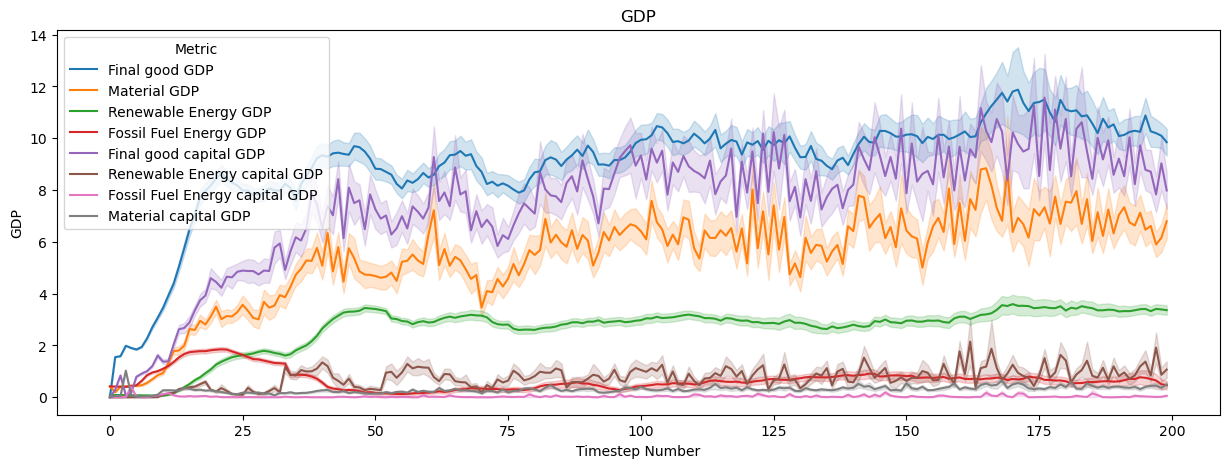

In [231]:
gdp_vars = ['Final good GDP',
            'Material GDP',
            'Renewable Energy GDP',
            'Fossil Fuel Energy GDP',
            'Final good capital GDP',
            'Renewable Energy capital GDP',
            'Fossil Fuel Energy capital GDP',
            'Material capital GDP']

gdp_df = df.loc[gdp_vars]


plt.figure(figsize=fig_size)
sns.lineplot(x='Timestep Number',
                y='Value',
                data=gdp_df,#df.loc[gdp_vars],
                hue='Metric',
                errorbar=errorbar_format
                )
plt.title('GDP')
plt.xlabel('Timestep Number')
plt.ylabel('GDP')
if save_figs:
    plt.savefig('sectoral_gdp_line.'+format)
if show_figs:
    plt.show()
plt.close()

In [232]:
gdp_df_mean = gdp_df.groupby(['Metric', 'Scenario', 'Timestep Number']).mean()

In [233]:
# import matplotlib.pyplot as plt
# # Ensure the data is ordered according to gdp_vars
# gdp_df_ordered = gdp_df.reset_index()
# gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
# gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# # Pivot the DataFrame to prepare for the area plot
# stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# # Plot the stacked area plot
# plt.figure(figsize=(15, 8))
# stacked_gdp_df[gdp_vars].plot(kind='area', stacked=True, figsize=(15, 8), alpha=0.7)

# # Add labels and title
# plt.title('Stacked Area Plot of GDP Variables Over Time', fontsize=16)
# plt.xlabel('Timestep Number', fontsize=14)
# plt.ylabel('GDP', fontsize=14)
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Save or show the plot
# if save_figs:
#     plt.savefig('sectoral_gdp_stacked_area.' + format)
# if show_figs:
#     plt.show()
# plt.close()

In [234]:
# import matplotlib.pyplot as plt

# # Ensure the data is ordered according to gdp_vars
# gdp_df_ordered = gdp_df.reset_index()
# gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
# gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# # Pivot the DataFrame to prepare for the area plot
# stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# # Normalize the data to make it 100% stacked
# stacked_gdp_df_normalized = stacked_gdp_df.div(stacked_gdp_df.sum(axis=1), axis=0) * 100

# # Plot the 100% stacked area plot
# plt.figure(figsize=(15, 8))
# stacked_gdp_df_normalized[gdp_vars].plot(kind='area', stacked=True, figsize=(15, 8), alpha=0.7, colormap='tab10')

# # Add labels and title
# plt.title('100% Stacked Area Plot of GDP Variables Over Time', fontsize=16)
# plt.xlabel('Timestep Number', fontsize=14)
# plt.ylabel('Percentage (%)', fontsize=14)
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Save or show the plot
# if save_figs:
#     plt.savefig('sectoral_gdp_100pct_stacked_area.' + format)
# if show_figs:
#     plt.show()
# plt.close()

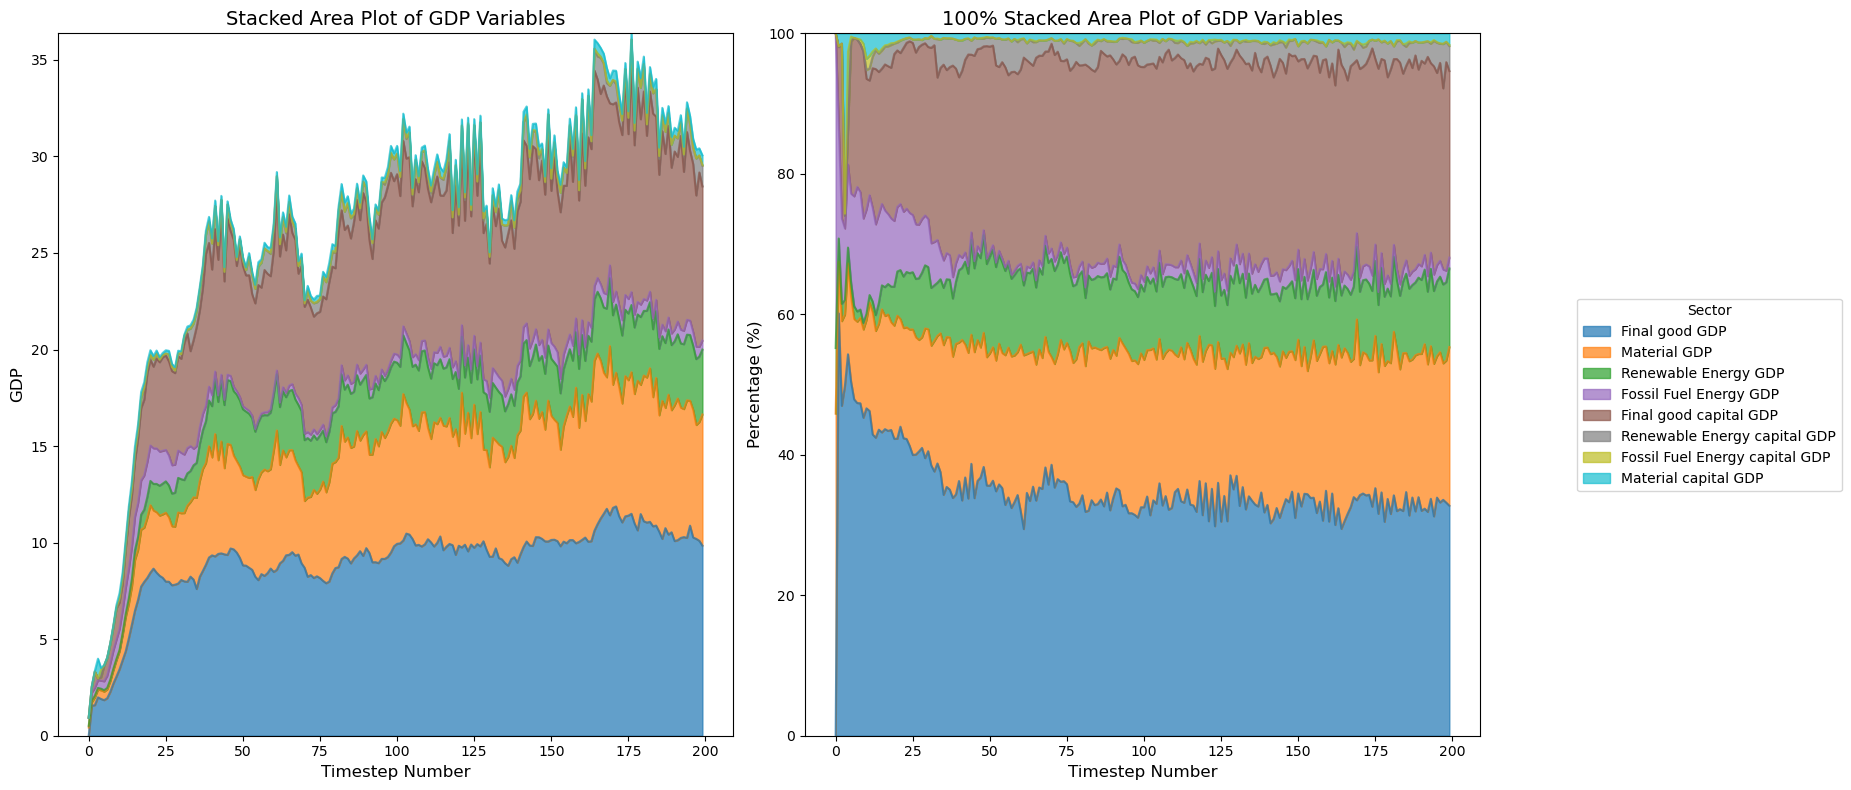

In [235]:
import matplotlib.pyplot as plt

# Ensure the data is ordered according to gdp_vars
gdp_df_ordered = gdp_df_mean.reset_index()
gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# Pivot the DataFrame to prepare for the area plots
stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# Normalize the data to make it 100% stacked
stacked_gdp_df_normalized = stacked_gdp_df.div(stacked_gdp_df.sum(axis=1), axis=0) * 100

# Calculate the maximum value for the y-axis of the first plot
max_y = stacked_gdp_df[gdp_vars].sum(axis=1).max()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=False)

# Plot the stacked area plot
stacked_gdp_df[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[0], colormap='tab10')
axes[0].set_title('Stacked Area Plot of GDP Variables', fontsize=14)
axes[0].set_xlabel('Timestep Number', fontsize=12)
axes[0].set_ylabel('GDP', fontsize=12)
axes[0].set_ylim(0, max_y)  # Set y-axis limit to the maximum value
axes[0].legend_.remove()  # Remove the legend from this subplot

# Plot the 100% stacked area plot
stacked_gdp_df_normalized[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[1], colormap='tab10')
axes[1].set_title('100% Stacked Area Plot of GDP Variables', fontsize=14)
axes[1].set_xlabel('Timestep Number', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_ylim(0, 100)  # Set y-axis limit to 100 for the normalized plot
axes[1].legend_.remove()  # Remove the legend from this subplot

# Add a shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Sector', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()

# Save or show the plot
if save_figs:
    plt.savefig('sectoral_gdp_stacked_area_side_by_side.' + format, bbox_inches='tight')
if show_figs:
    plt.show()
plt.close()

In [236]:
def smooth(df, window=10):
    metrics_unique = df.index.get_level_values('Metric').unique()
    scenarios_unique = df.index.get_level_values('Scenario').unique()
    simulations_unique = df.index.get_level_values('Simulation Number').unique()
    timesteps_unique = df.index.get_level_values('Timestep Number').unique()

    for metric in metrics_unique:
        for scenario in scenarios_unique:
            for simulation_number in simulations_unique:
                try:
                    Smooth_Value = df.loc[(metric, scenario, simulation_number), 'Value'].rolling(window).mean()
                except KeyError:
                    pass
                # df.loc[(metric, scenario, simulation_number)]['Value'] = Smooth_Value
                for timestep in timesteps_unique:
                    try:
                        df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]
                    except KeyError:
                        pass
                # print(df.loc[metric, scenario, simulation_number])

In [237]:
# import random
# simulation_number = random.randint(0, gdp_df.index.get_level_values('Simulation Number').max())
# gdp_df_simulation_0 = gdp_df.loc[(slice(None), slice(None), simulation_number, slice(None)), :]
# smooth(gdp_df_simulation_0, window=smooth_window)

In [238]:
# plt.figure(figsize=fig_size)
# sns.lineplot(x='Timestep Number',
#                 y='Value',
#                 data=gdp_df_simulation_0,#df.loc[gdp_vars],
#                 hue='Metric',
#                 errorbar=errorbar_format
#                 )
# plt.title('Sectoral GDP, single trajectory, smoothed')
# plt.xlabel('Timestep Number')
# plt.ylabel('GDP')
# if save_figs:
#     plt.savefig('sim0_smooth_sectoral_gdp_line.'+format)
# if show_figs:
#     plt.show()
# plt.close()

In [239]:
# import matplotlib.pyplot as plt

# # Ensure the data is ordered according to gdp_vars
# gdp_df_ordered = gdp_df.reset_index()
# gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
# gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# # Pivot the DataFrame to prepare for the area plot
# stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# # Plot the stacked area plot
# plt.figure(figsize=(15, 8))
# stacked_gdp_df[gdp_vars].plot(kind='area', stacked=True, figsize=(15, 8), alpha=0.7)

# # Add labels and title
# plt.title('Stacked Area Plot of GDP Variables Over Time', fontsize=16)
# plt.xlabel('Timestep Number', fontsize=14)
# plt.ylabel('GDP', fontsize=14)
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Save or show the plot
# if save_figs:
#     plt.savefig('stacked_area_gdp.' + format)
# if show_figs:
#     plt.show()
# plt.close()

In [240]:
# import matplotlib.pyplot as plt

# # Ensure the data is ordered according to gdp_vars
# gdp_df_ordered = gdp_df.reset_index()
# gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
# gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# # Pivot the DataFrame to prepare for the area plot
# stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# # Normalize the data to make it 100% stacked
# stacked_gdp_df_normalized = stacked_gdp_df.div(stacked_gdp_df.sum(axis=1), axis=0) * 100

# # Plot the 100% stacked area plot
# plt.figure(figsize=(15, 8))
# stacked_gdp_df_normalized[gdp_vars].plot(kind='area', stacked=True, figsize=(15, 8), alpha=0.7, colormap='tab10')

# # Add labels and title
# plt.title('100% Stacked Area Plot of GDP Variables Over Time', fontsize=16)
# plt.xlabel('Timestep Number', fontsize=14)
# plt.ylabel('Percentage (%)', fontsize=14)
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Save or show the plot
# if save_figs:
#     plt.savefig('100_percent_stacked_area_gdp.' + format)
# if show_figs:
#     plt.show()
# plt.close()

/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  Smooth_Value = df.loc[(metric, scenario, simulation_number), 'Value'].rolling(window).mean()
/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]
/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]


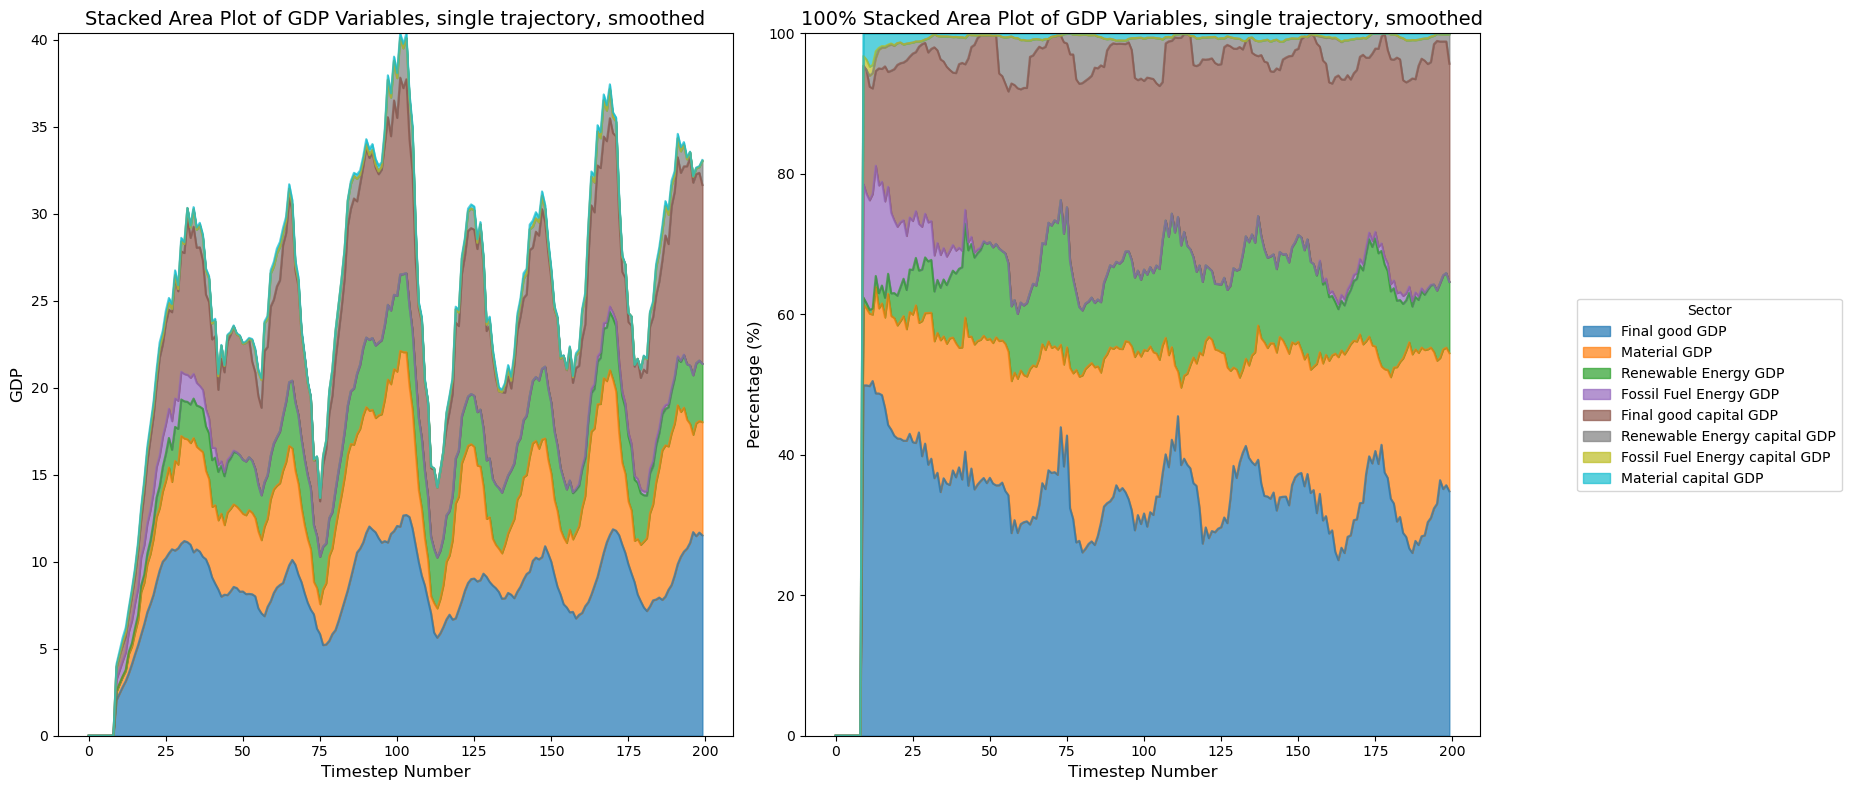

In [241]:
import matplotlib.pyplot as plt
import random
simulation_number = random.randint(0, gdp_df.index.get_level_values('Simulation Number').max())
gdp_df_simulation_0 = gdp_df.loc[(slice(None), slice(None), simulation_number, slice(None)), :]
smooth(gdp_df_simulation_0, window=smooth_window)
# Ensure the data is ordered according to gdp_vars
gdp_df_ordered = gdp_df_simulation_0.reset_index()
gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# Pivot the DataFrame to prepare for the area plots
stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# Normalize the data to make it 100% stacked
stacked_gdp_df_normalized = stacked_gdp_df.div(stacked_gdp_df.sum(axis=1), axis=0) * 100

# Calculate the maximum value for the y-axis of the first plot
max_y = stacked_gdp_df[gdp_vars].sum(axis=1).max()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=False)

# Plot the stacked area plot
stacked_gdp_df[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[0], colormap='tab10')
axes[0].set_title('Stacked Area Plot of GDP Variables, single trajectory, smoothed', fontsize=14)
axes[0].set_xlabel('Timestep Number', fontsize=12)
axes[0].set_ylabel('GDP', fontsize=12)
axes[0].set_ylim(0, max_y)  # Set y-axis limit to the maximum value
axes[0].legend_.remove()  # Remove the legend from this subplot

# Plot the 100% stacked area plot
stacked_gdp_df_normalized[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[1], colormap='tab10')
axes[1].set_title('100% Stacked Area Plot of GDP Variables, single trajectory, smoothed', fontsize=14)
axes[1].set_xlabel('Timestep Number', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_ylim(0, 100)  # Set y-axis limit to 100 for the normalized plot
axes[1].legend_.remove()  # Remove the legend from this subplot

# Add a shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Sector', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()

# Save or show the plot
if save_figs:
    plt.savefig('sim0_smooth_stacked_area_plots_side_by_side.' + format, bbox_inches='tight')
if show_figs:
    plt.show()
plt.close()

/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  Smooth_Value = df.loc[(metric, scenario, simulation_number), 'Value'].rolling(window).mean()
/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]
/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]


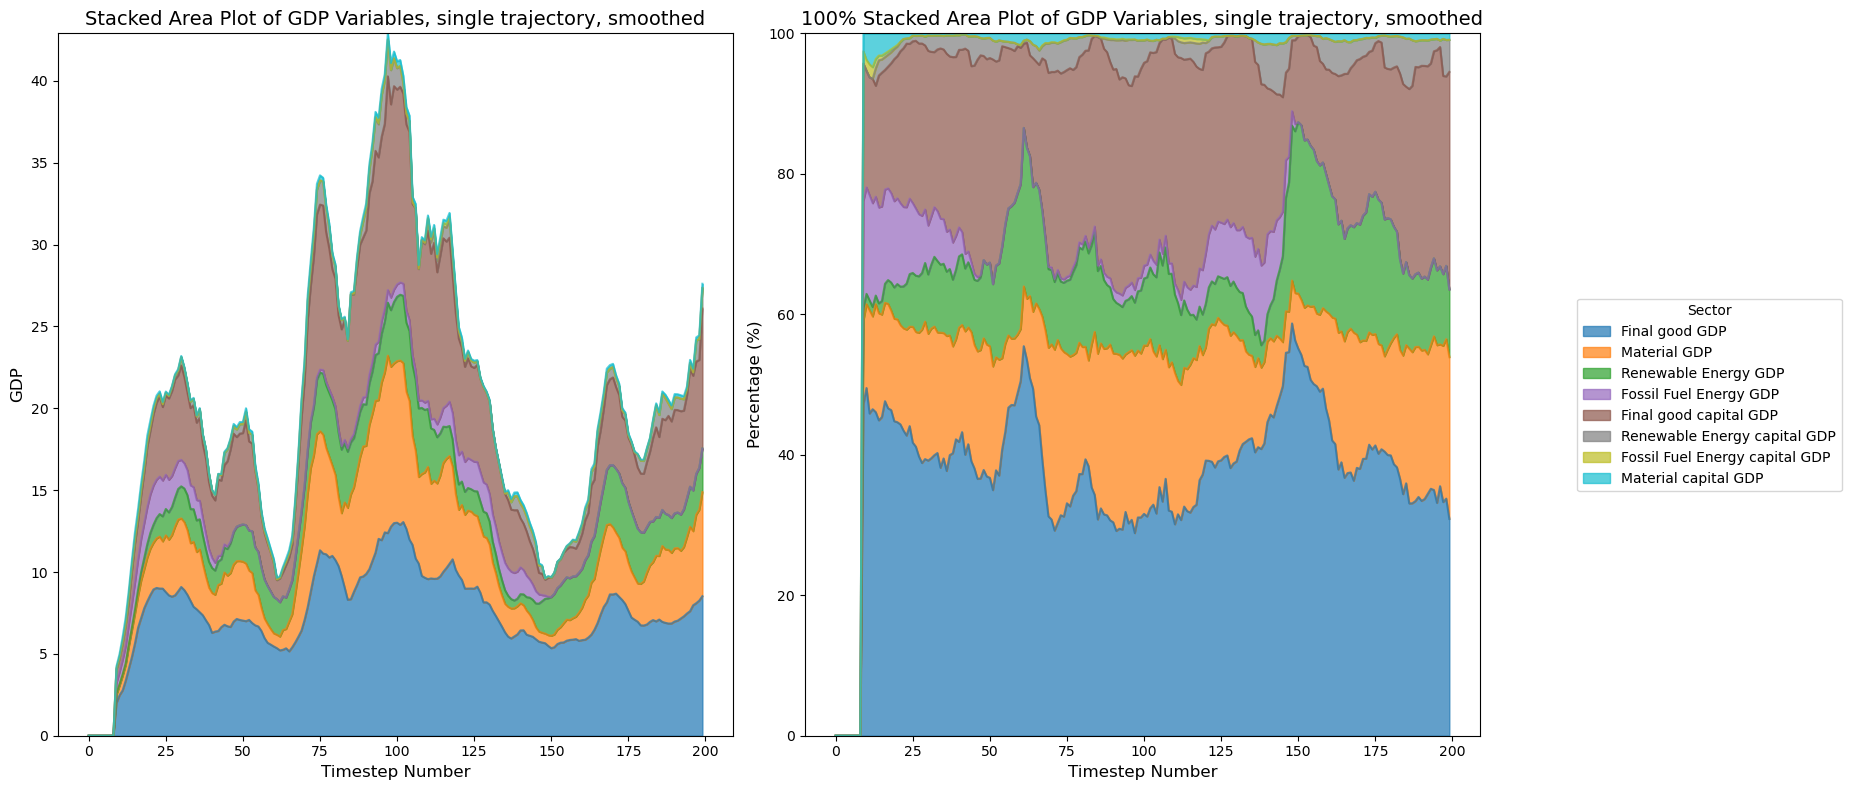

In [242]:
import matplotlib.pyplot as plt
import random
simulation_number = random.randint(0, gdp_df.index.get_level_values('Simulation Number').max())
gdp_df_simulation_0 = gdp_df.loc[(slice(None), slice(None), simulation_number, slice(None)), :]
smooth(gdp_df_simulation_0, window=smooth_window)
# Ensure the data is ordered according to gdp_vars
gdp_df_ordered = gdp_df_simulation_0.reset_index()
gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# Pivot the DataFrame to prepare for the area plots
stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# Normalize the data to make it 100% stacked
stacked_gdp_df_normalized = stacked_gdp_df.div(stacked_gdp_df.sum(axis=1), axis=0) * 100

# Calculate the maximum value for the y-axis of the first plot
max_y = stacked_gdp_df[gdp_vars].sum(axis=1).max()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=False)

# Plot the stacked area plot
stacked_gdp_df[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[0], colormap='tab10')
axes[0].set_title('Stacked Area Plot of GDP Variables, single trajectory, smoothed', fontsize=14)
axes[0].set_xlabel('Timestep Number', fontsize=12)
axes[0].set_ylabel('GDP', fontsize=12)
axes[0].set_ylim(0, max_y)  # Set y-axis limit to the maximum value
axes[0].legend_.remove()  # Remove the legend from this subplot

# Plot the 100% stacked area plot
stacked_gdp_df_normalized[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[1], colormap='tab10')
axes[1].set_title('100% Stacked Area Plot of GDP Variables, single trajectory, smoothed', fontsize=14)
axes[1].set_xlabel('Timestep Number', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_ylim(0, 100)  # Set y-axis limit to 100 for the normalized plot
axes[1].legend_.remove()  # Remove the legend from this subplot

# Add a shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Sector', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()

# Save or show the plot
if save_figs:
    plt.savefig('sim1_smooth_stacked_area_plots_side_by_side.' + format, bbox_inches='tight')
if show_figs:
    plt.show()
plt.close()

/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  Smooth_Value = df.loc[(metric, scenario, simulation_number), 'Value'].rolling(window).mean()
/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]
/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]


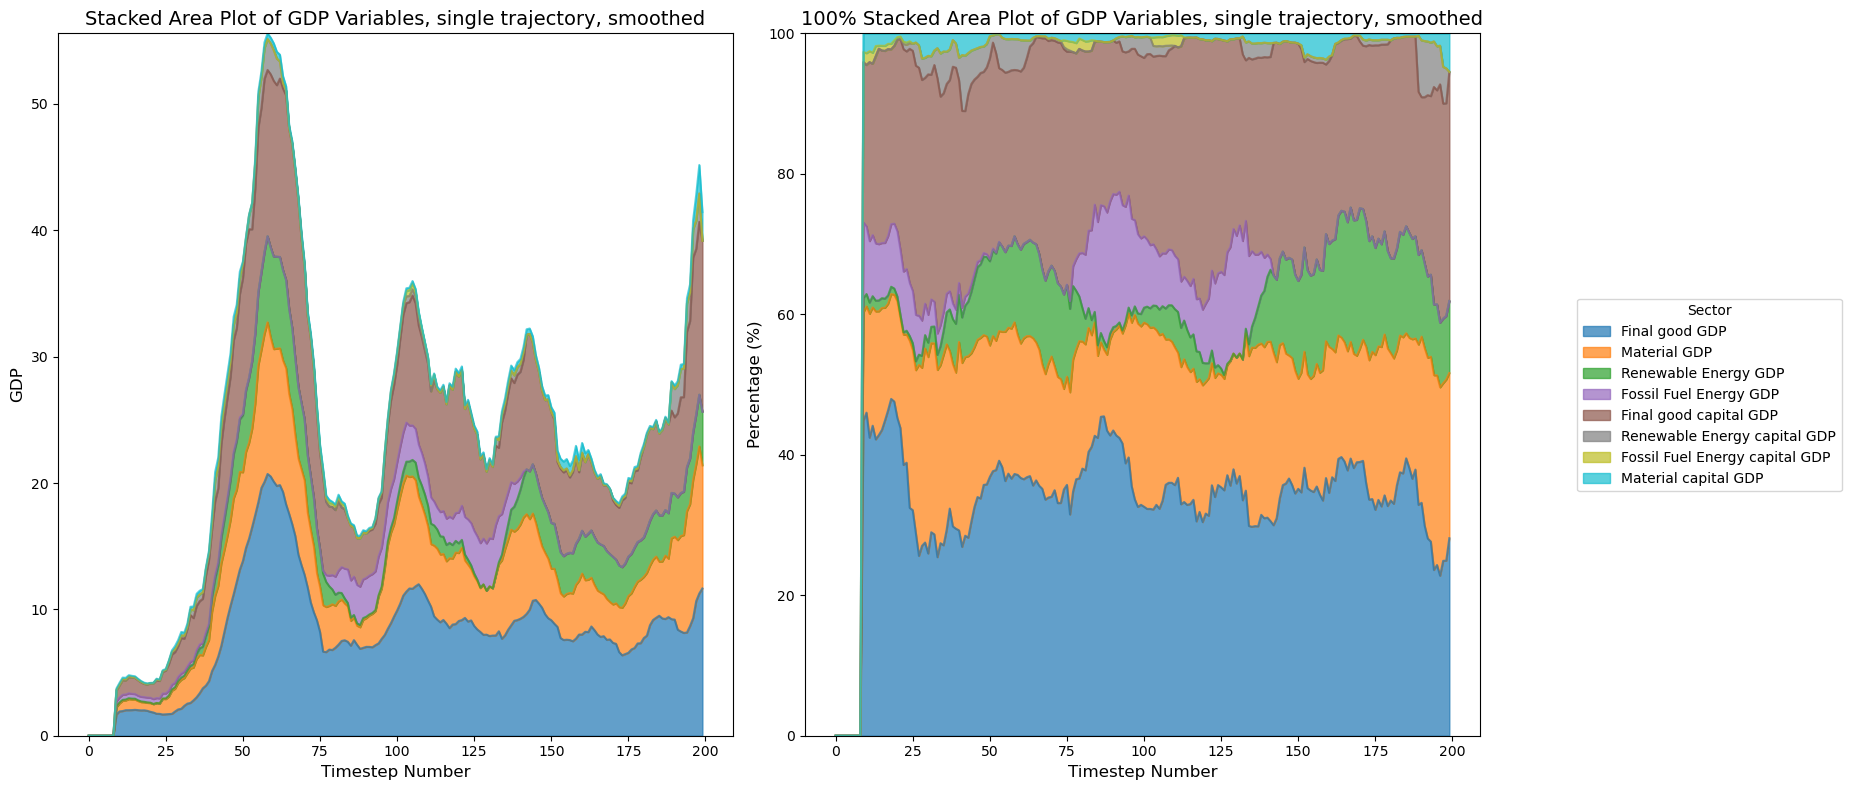

In [243]:
import matplotlib.pyplot as plt
import random
simulation_number = random.randint(0, gdp_df.index.get_level_values('Simulation Number').max())
gdp_df_simulation_0 = gdp_df.loc[(slice(None), slice(None), simulation_number, slice(None)), :]
smooth(gdp_df_simulation_0, window=smooth_window)
# Ensure the data is ordered according to gdp_vars
gdp_df_ordered = gdp_df_simulation_0.reset_index()
gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# Pivot the DataFrame to prepare for the area plots
stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# Normalize the data to make it 100% stacked
stacked_gdp_df_normalized = stacked_gdp_df.div(stacked_gdp_df.sum(axis=1), axis=0) * 100

# Calculate the maximum value for the y-axis of the first plot
max_y = stacked_gdp_df[gdp_vars].sum(axis=1).max()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=False)

# Plot the stacked area plot
stacked_gdp_df[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[0], colormap='tab10')
axes[0].set_title('Stacked Area Plot of GDP Variables, single trajectory, smoothed', fontsize=14)
axes[0].set_xlabel('Timestep Number', fontsize=12)
axes[0].set_ylabel('GDP', fontsize=12)
axes[0].set_ylim(0, max_y)  # Set y-axis limit to the maximum value
axes[0].legend_.remove()  # Remove the legend from this subplot

# Plot the 100% stacked area plot
stacked_gdp_df_normalized[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[1], colormap='tab10')
axes[1].set_title('100% Stacked Area Plot of GDP Variables, single trajectory, smoothed', fontsize=14)
axes[1].set_xlabel('Timestep Number', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_ylim(0, 100)  # Set y-axis limit to 100 for the normalized plot
axes[1].legend_.remove()  # Remove the legend from this subplot

# Add a shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Sector', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()

# Save or show the plot
if save_figs:
    plt.savefig('sim2_smooth_stacked_area_plots_side_by_side.' + format, bbox_inches='tight')
if show_figs:
    plt.show()
plt.close()

/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  Smooth_Value = df.loc[(metric, scenario, simulation_number), 'Value'].rolling(window).mean()
/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]
/var/folders/j2/3w_7jp6532z9rnqkt9c_tdx40000gn/T/ipykernel_2908/3504499229.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(metric, scenario, simulation_number, timestep), 'Value'] = Smooth_Value[timestep]


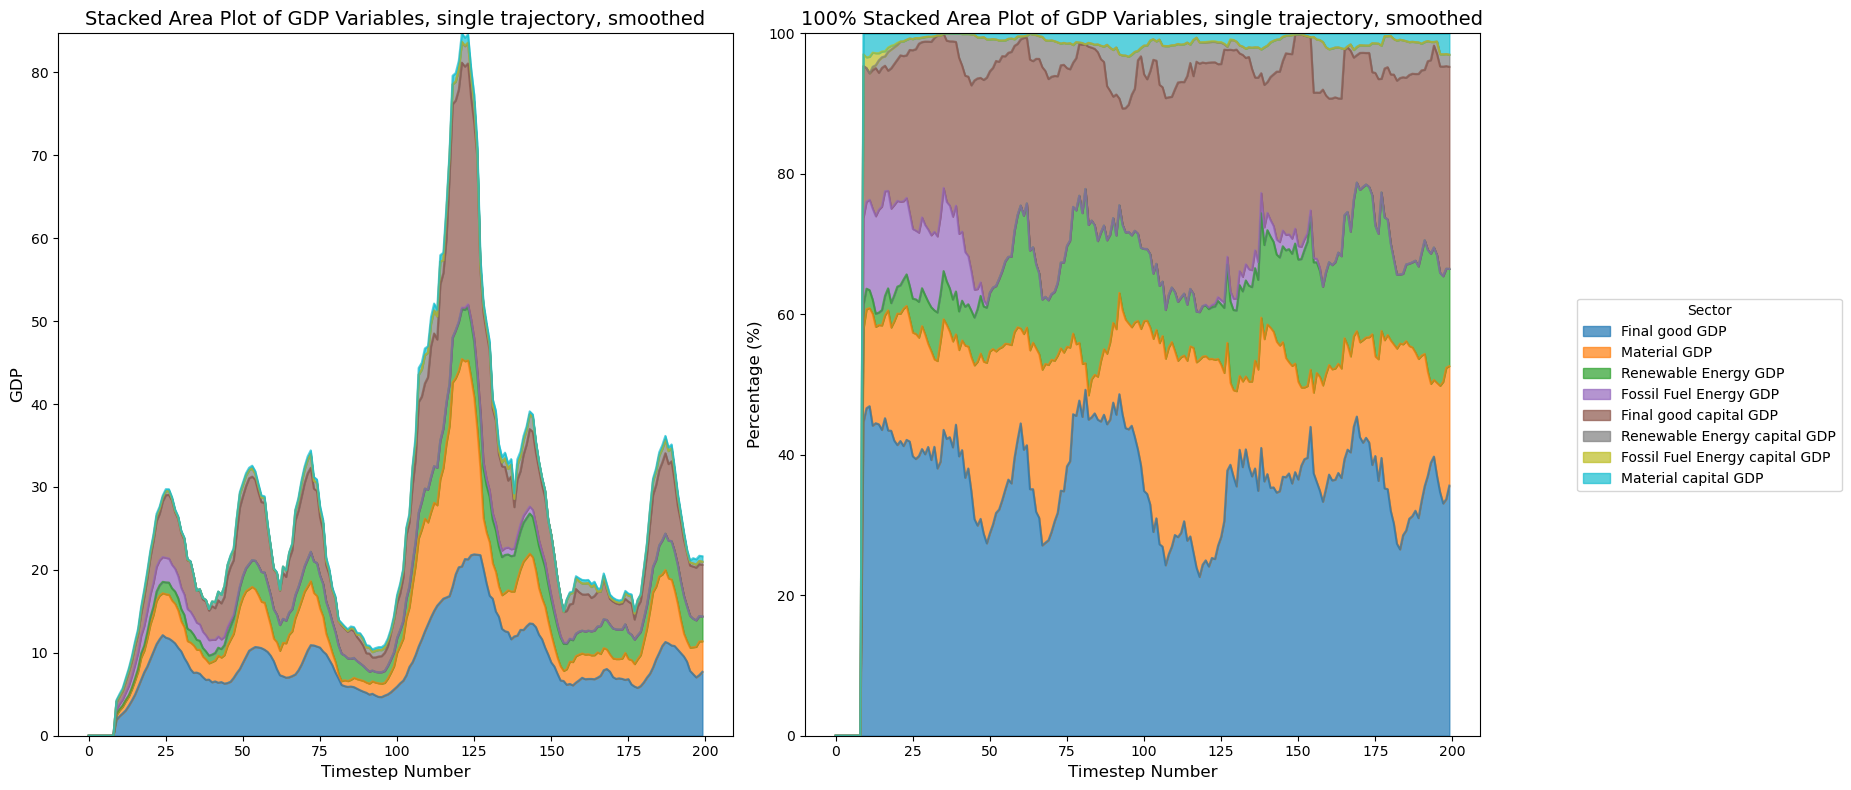

In [244]:
import matplotlib.pyplot as plt
import random
simulation_number = random.randint(0, gdp_df.index.get_level_values('Simulation Number').max())
gdp_df_simulation_0 = gdp_df.loc[(slice(None), slice(None), simulation_number, slice(None)), :]
smooth(gdp_df_simulation_0, window=smooth_window)
# Ensure the data is ordered according to gdp_vars
gdp_df_ordered = gdp_df_simulation_0.reset_index()
gdp_df_ordered['Metric'] = pd.Categorical(gdp_df_ordered['Metric'], categories=gdp_vars, ordered=True)
gdp_df_ordered = gdp_df_ordered.sort_values(by=['Metric', 'Timestep Number'])

# Pivot the DataFrame to prepare for the area plots
stacked_gdp_df = gdp_df_ordered.pivot(index='Timestep Number', columns='Metric', values='Value')

# Normalize the data to make it 100% stacked
stacked_gdp_df_normalized = stacked_gdp_df.div(stacked_gdp_df.sum(axis=1), axis=0) * 100

# Calculate the maximum value for the y-axis of the first plot
max_y = stacked_gdp_df[gdp_vars].sum(axis=1).max()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=False)

# Plot the stacked area plot
stacked_gdp_df[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[0], colormap='tab10')
axes[0].set_title('Stacked Area Plot of GDP Variables, single trajectory, smoothed', fontsize=14)
axes[0].set_xlabel('Timestep Number', fontsize=12)
axes[0].set_ylabel('GDP', fontsize=12)
axes[0].set_ylim(0, max_y)  # Set y-axis limit to the maximum value
axes[0].legend_.remove()  # Remove the legend from this subplot

# Plot the 100% stacked area plot
stacked_gdp_df_normalized[gdp_vars].plot(kind='area', stacked=True, alpha=0.7, ax=axes[1], colormap='tab10')
axes[1].set_title('100% Stacked Area Plot of GDP Variables, single trajectory, smoothed', fontsize=14)
axes[1].set_xlabel('Timestep Number', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_ylim(0, 100)  # Set y-axis limit to 100 for the normalized plot
axes[1].legend_.remove()  # Remove the legend from this subplot

# Add a shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Sector', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()

# Save or show the plot
if save_figs:
    plt.savefig('sim3_smooth_stacked_area_plots_side_by_side.' + format, bbox_inches='tight')
if show_figs:
    plt.show()
plt.close()

In [245]:
# stacked_gdp_df = gdp_df.reset_index().pivot(index='Timestep Number', columns='Metric', values='Value')

In [246]:
# stacked_gdp_df.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.title('Stacked GDP Sectoral Figures')
# plt.xlabel('Timestep Number')
# plt.ylabel('GDP')
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

In [247]:
# # Smooth the data using a rolling window
# smoothed_gdp_df = stacked_gdp_df.rolling(window=smooth_window, min_periods=10).mean()

# # Plot the smoothed data
# smoothed_gdp_df.plot(kind='line', figsize=(20, 10), linewidth=2)
# plt.title('Smoothed Sectoral GDPs Over Time')
# plt.xlabel('Timestep Number')
# plt.ylabel('GDP')
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# if save_figs:
#     plt.savefig('smoothed_sectoral_gdp.' + format)
# if show_figs:
#     plt.show()
# plt.close()

In [248]:
# # Plot the smoothed data with proper alignment
# plt.figure(figsize=(15, 6))
# for column in stacked_gdp_df.columns:
#     plt.plot(stacked_gdp_df.index, stacked_gdp_df[column], label=column, linewidth=2)

# plt.title('Non-smoothed Sectoral GDPs Over Time')
# plt.xlabel('Timestep Number')
# plt.ylabel('GDP')
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# if save_figs:
#     plt.savefig('aligned_smoothed_sectoral_gdp.' + format)
# if show_figs:
#     plt.show()
# plt.close()

In [249]:
# # Plot the smoothed data with proper alignment
# plt.figure(figsize=(15, 6))
# for column in smoothed_gdp_df.columns:
#     plt.plot(smoothed_gdp_df.index, smoothed_gdp_df[column], label=column, linewidth=2)

# plt.title('Smoothed Sectoral GDPs Over Time')
# plt.xlabel('Timestep Number')
# plt.ylabel('GDP')
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# if save_figs:
#     plt.savefig('aligned_smoothed_sectoral_gdp.' + format)
# if show_figs:
#     plt.show()
# plt.close()

In [250]:
# stacked_gdp_df.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.title('Stacked GDP Sectoral Figures')
# plt.xlabel('Timestep Number')
# plt.ylabel('GDP')
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()